In [2]:
# Import Torch
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Support libraries 
import matplotlib.pyplot as plt
import numpy as np

# For reporducibility
torch.manual_seed(42)
np.random.seed(42)

# using Gpu device if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}.")
device


Running on cuda.


device(type='cuda')

In [7]:
import torch.utils.data as data

In [48]:
# Defining a transformation pipeline
transform = transforms.Compose([transforms.ToTensor()])

# We'll use torchvision to load Fashion MNIST trainset
trainset_data = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=True,
                                                  download=True,
                                                  transform=transform)
# Create a data loader for trainset
train_load = data.DataLoader(trainset_data, batch_size=64, shuffle=True, num_workers=2)

# Similarly, load the testset of Fashion MNIST
testset_data = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=False,
                                                  download=True,
                                                  transform=transform)
# Create a data loader for testset
test_load = data.DataLoader(testset_data, batch_size=64, shuffle=True, num_workers=2)

# We save the respective output of the neuron and the name of each classes
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']

In [49]:
dataset = torchvision.datasets.FashionMNIST(root='./data',
                                            train=False,
                                            download=True)
dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [50]:
dataiter = iter(train_load)
dataiter

images, labels = next(dataiter)

images = np.squeeze(images)

In [51]:
images.shape

torch.Size([64, 28, 28])

C:\Users\danie\AppData\Local\Temp\ipykernel_23592\1231048956.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


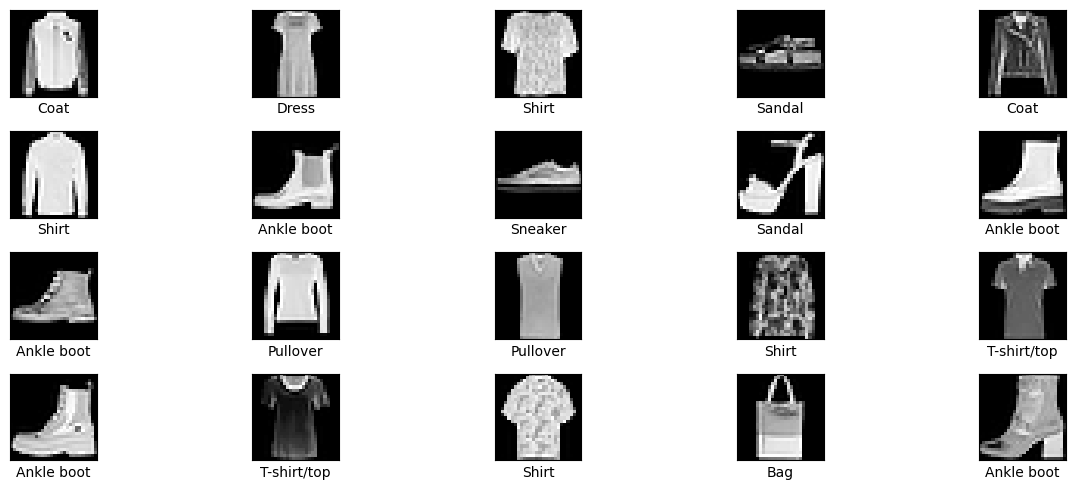

In [52]:
# Showing the images
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4,int(20/4),i+1, xticks=[],yticks=[])
    # plt.xticks([])
    # plt.yticks([])
    #plt.grid(False)
    ax.imshow(np.squeeze(images[i]),cmap='gray')
    ax.set_xlabel(class_names[labels[i].item()])
    fig.tight_layout()
fig.show()

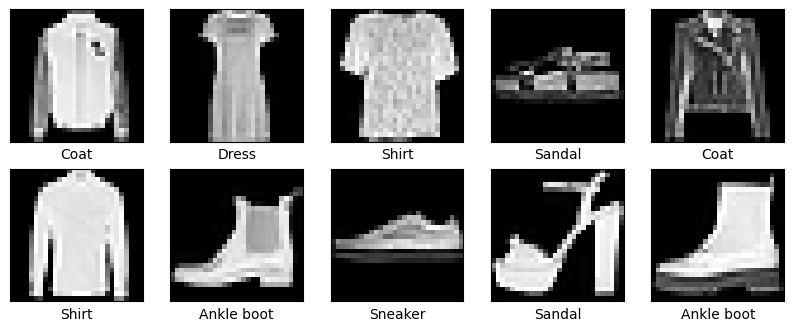

In [53]:
# Showing the images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28,28),cmap='gray')
    plt.xlabel(class_names[labels[i].item()])
plt.show()